<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/HW3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import diabetes data set
data = pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Seperating diabetes data
y2 = data.values[:, 8]        # diagnoses
x2 = data.values[:, 0:7]      # All inputs

# Seperating training and validation for diabetes
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 0)


# Scale diabetes data
from sklearn.preprocessing import StandardScaler
sc_x2 = StandardScaler()
x2_train = sc_x2.fit_transform(x2_train)
x2_test = sc_x2.transform(x2_test)

# Logistic Regression of diabetes data
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(x2_train, y2_train)



LogisticRegression(random_state=0)

In [ ]:
# Predicting diabetes test output
y2_pred = classifier2.predict(x2_test)
y2_pred[0:9]

array([1., 0., 0., 1., 0., 0., 1., 1., 0.])

In [ ]:
# Confusion matrix to check diabetes accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix2 = confusion_matrix(y2_test, y2_pred)
cnf_matrix2

array([[97, 10],
       [19, 28]])

In [ ]:
# Evaluation of diabetes model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1 score:",metrics.f1_score(y2_test, y2_pred))


Accuracy: 0.8116883116883117
Precision: 0.7368421052631579
Recall: 0.5957446808510638
F1 score: 0.6588235294117647


Text(0.5, 427.9555555555555, 'Predicted label')

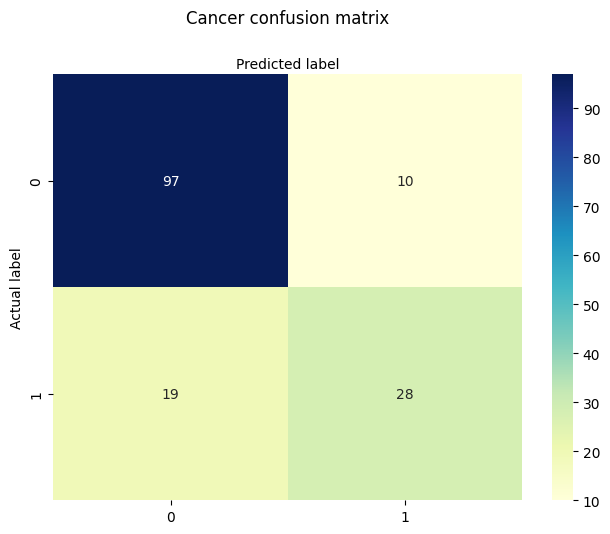

In [ ]:
# Creating visual diabetes confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Cancer confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')